<a href="https://colab.research.google.com/github/mpartain1/Project2CodingDojo/blob/main/Project2Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Data Set 1
#Source of Data: UCI Machine Learning Repository

#This data set relates to the quality of "Vinho Verde" red wine.  It contains attributes such as fixed acidity, 
#chlorides, and residual sugar.

#The target is quality (score between 0 and 10)

#This is a regression problem

#12 features

#4898 rows of data

#Challenge could be trying to assess the most influential factors that predict wine quality.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.ensemble import BaggingRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

set_config(display='diagram')
df = pd.read_csv('/content/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


No unnecessary columns to delete

In [3]:
df.drop_duplicates(inplace=True, keep = 'first')

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NA values

No categorical values to address inconcistencies for

Below are univariate visualizations of the columns.


Upper Outliers:
       fixed acidity
596            12.4
338            12.4
548            12.4
510            12.4
516            12.5
409            12.5
264            12.5
339            12.5
446            12.5
472            12.5
363            12.5
814            12.6
1224           12.6
359            12.6
440            12.6
560            12.7
394            12.7
599            12.7
205            12.8
429            12.8
364            12.8
811            12.9
538            12.9
559            13.0
470            13.0
601            13.2
611            13.2
509            13.3
294            13.3
680            13.3
328            13.4
353            13.5
381            13.7
347            13.8
374            14.0
544            14.3
243            15.0
554            15.5
442            15.6
557            15.6
652            15.9
Lower Outliers:
 Empty DataFrame
Columns: [fixed acidity]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa110744c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa110752d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa11075ad90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa11075a850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa110744dd0>,
  <matplotlib.lines.Line2D at 0x7fa110752810>]}

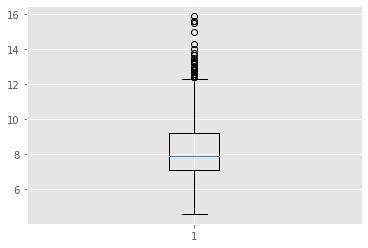

In [5]:
upper_outlier_value = 1.5*(df['fixed acidity'].describe()[6]-df['fixed acidity'].describe()[4]) + df['fixed acidity'].describe()[6]
lower_outlier_value =  df['fixed acidity'].describe()[4]-1.5*(df['fixed acidity'].describe()[6]-df['fixed acidity'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['fixed acidity']>upper_outlier_value, 'fixed acidity'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['fixed acidity']<lower_outlier_value, 'fixed acidity'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')
plt.style.use('ggplot')
plt.boxplot(df['fixed acidity'])


Upper Outliers:
       residual sugar
1138            3.70
1552            3.70
442             3.70
408             3.70
1471            3.75
...              ...
1244           13.40
1474           13.80
1574           13.90
1434           15.40
480            15.50

[126 rows x 1 columns]
Lower Outliers:
 Empty DataFrame
Columns: [residual sugar]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa110231510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa1102364d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa11023e510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa110236f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa110231a10>,
  <matplotlib.lines.Line2D at 0x7fa110231f50>]}

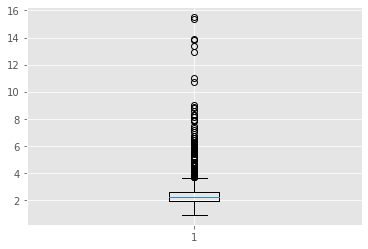

In [6]:
upper_outlier_value = 1.5*(df['residual sugar'].describe()[6]-df['residual sugar'].describe()[4]) + df['residual sugar'].describe()[6]
lower_outlier_value =  df['residual sugar'].describe()[4]-1.5*(df['residual sugar'].describe()[6]-df['residual sugar'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['residual sugar']>upper_outlier_value, 'residual sugar'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['residual sugar']<lower_outlier_value, 'residual sugar'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['residual sugar'])

Upper Outliers:
       volatile acidity
94               1.020
1261             1.020
899              1.020
700              1.020
710              1.025
705              1.035
1467             1.040
134              1.040
553              1.040
120              1.070
199              1.090
724              1.115
38               1.130
1312             1.180
690              1.185
672              1.240
127              1.330
126              1.330
1299             1.580
Lower Outliers:
 Empty DataFrame
Columns: [volatile acidity]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa1101b5710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa1101bc6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1101c1710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1101c11d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa1101b5c10>,
  <matplotlib.lines.Line2D at 0x7fa1101bc190>]}

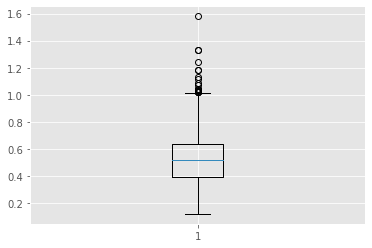

In [7]:
upper_outlier_value = 1.5*(df['volatile acidity'].describe()[6]-df['volatile acidity'].describe()[4]) + df['volatile acidity'].describe()[6]
lower_outlier_value =  df['volatile acidity'].describe()[4]-1.5*(df['volatile acidity'].describe()[6]-df['volatile acidity'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['volatile acidity']>upper_outlier_value, 'volatile acidity'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['volatile acidity']<lower_outlier_value, 'volatile acidity'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['volatile acidity'])

Upper Outliers:
      citric acid
151          1.0
Lower Outliers:
 Empty DataFrame
Columns: [citric acid]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa110133e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa11013be10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa110142e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa110142910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa11013b390>,
  <matplotlib.lines.Line2D at 0x7fa11013b8d0>]}

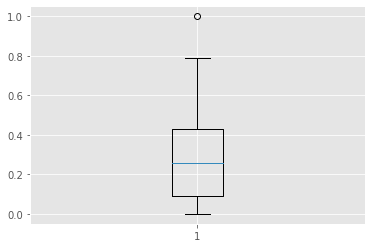

In [8]:
upper_outlier_value = 1.5*(df['citric acid'].describe()[6]-df['citric acid'].describe()[4]) + df['citric acid'].describe()[6]
lower_outlier_value =  df['citric acid'].describe()[4]-1.5*(df['citric acid'].describe()[6]-df['citric acid'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['citric acid']>upper_outlier_value, 'citric acid'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['citric acid']<lower_outlier_value, 'citric acid'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['citric acid'])

Upper Outliers:
       chlorides
1020      0.123
1423      0.123
1258      0.123
1252      0.123
624       0.124
...         ...
692       0.422
81        0.464
106       0.467
151       0.610
258       0.611

[83 rows x 1 columns]
Lower Outliers:
       chlorides
836       0.012
695       0.034
797       0.038
1571      0.038


{'boxes': [<matplotlib.lines.Line2D at 0x7fa1100ae310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa1100b42d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1100bb310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1100b4d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa1100ae810>,
  <matplotlib.lines.Line2D at 0x7fa1100aed50>]}

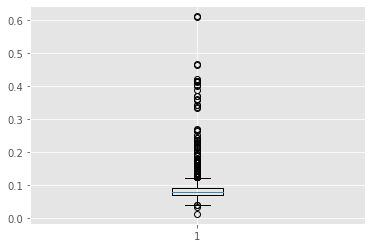

In [9]:
upper_outlier_value = 1.5*(df['chlorides'].describe()[6]-df['chlorides'].describe()[4]) + df['chlorides'].describe()[6]
lower_outlier_value =  df['chlorides'].describe()[4]-1.5*(df['chlorides'].describe()[6]-df['chlorides'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['chlorides']>upper_outlier_value, 'chlorides'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['chlorides']<lower_outlier_value, 'chlorides'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['chlorides'])

Upper Outliers:
       free sulfur dioxide
1217                 43.0
1256                 43.0
497                  43.0
1075                 45.0
1156                 45.0
678                  45.0
634                  46.0
522                  47.0
1231                 48.0
1474                 48.0
1175                 48.0
57                   50.0
1154                 50.0
1295                 51.0
982                  51.0
15                   51.0
1358                 52.0
14                   52.0
926                  52.0
925                  53.0
584                  54.0
1434                 55.0
1131                 57.0
1558                 66.0
396                  68.0
1244                 72.0
Lower Outliers:
 Empty DataFrame
Columns: [free sulfur dioxide]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa1100a44d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa11002a490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1100324d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa11002af50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa1100a49d0>,
  <matplotlib.lines.Line2D at 0x7fa1100a4f10>]}

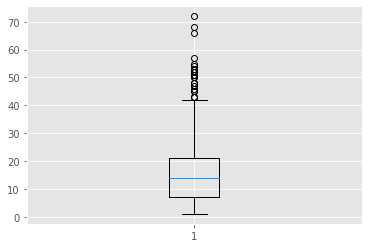

In [10]:
upper_outlier_value = 1.5*(df['free sulfur dioxide'].describe()[6]-df['free sulfur dioxide'].describe()[4]) + df['free sulfur dioxide'].describe()[6]
lower_outlier_value =  df['free sulfur dioxide'].describe()[4]-1.5*(df['free sulfur dioxide'].describe()[6]-df['free sulfur dioxide'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['free sulfur dioxide']>upper_outlier_value, 'free sulfur dioxide'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['free sulfur dioxide']<lower_outlier_value, 'free sulfur dioxide'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['free sulfur dioxide'])

Upper Outliers:
       total sulfur dioxide
88                   125.0
694                  125.0
192                  126.0
723                  127.0
190                  127.0
155                  128.0
463                  129.0
154                  129.0
791                  130.0
1559                 131.0
1419                 133.0
522                  133.0
92                   133.0
130                  134.0
415                  134.0
313                  135.0
1131                 135.0
86                   136.0
741                  139.0
90                   140.0
145                  141.0
1400                 141.0
523                  142.0
771                  143.0
188                  143.0
189                  144.0
219                  144.0
772                  144.0
14                   145.0
637                  145.0
201                  145.0
636                  147.0
1493                 147.0
15                   148.0
649                  148.0
591        

{'boxes': [<matplotlib.lines.Line2D at 0x7fa110018d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa11001ef50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa10ffaddd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa10ffad850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa11001e2d0>,
  <matplotlib.lines.Line2D at 0x7fa11001e810>]}

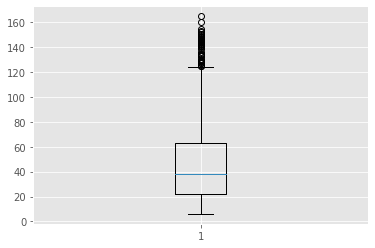

In [11]:
upper_outlier_value = 1.5*(df['total sulfur dioxide'].describe()[6]-df['total sulfur dioxide'].describe()[4]) + df['total sulfur dioxide'].describe()[6]
lower_outlier_value =  df['total sulfur dioxide'].describe()[4]-1.5*(df['total sulfur dioxide'].describe()[6]-df['total sulfur dioxide'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['total sulfur dioxide']>upper_outlier_value, 'total sulfur dioxide'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['total sulfur dioxide']<lower_outlier_value, 'total sulfur dioxide'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')
df.drop([1079, 1081], inplace=True)

plt.style.use('ggplot')
plt.boxplot(df['total sulfur dioxide'])

Upper Outliers:
       density
294   1.00140
374   1.00140
381   1.00140
415   1.00140
538   1.00140
324   1.00150
353   1.00180
559   1.00210
364   1.00220
1474  1.00242
608   1.00260
480   1.00260
889   1.00289
554   1.00315
557   1.00315
442   1.00320
1434  1.00369
Lower Outliers:
       density
1017  0.99007
1114  0.99020
836   0.99064
1269  0.99080
1270  0.99084
354   0.99120
1126  0.99150
821   0.99154
1228  0.99157
142   0.99160
999   0.99162
588   0.99170
1475  0.99182
1477  0.99182
1298  0.99191
695   0.99210
1122  0.99220
591   0.99220


{'boxes': [<matplotlib.lines.Line2D at 0x7fa10ff9e9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa10ffa1990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa10ffa99d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa10ffa9490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa10ff9eed0>,
  <matplotlib.lines.Line2D at 0x7fa10ffa1450>]}

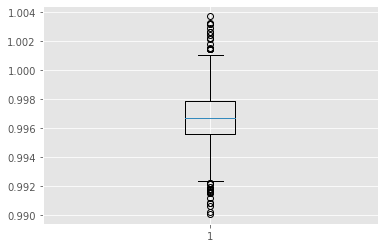

In [12]:
upper_outlier_value = 1.5*(df['density'].describe()[6]-df['density'].describe()[4]) + df['density'].describe()[6]
lower_outlier_value =  df['density'].describe()[4]-1.5*(df['density'].describe()[6]-df['density'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['density']>upper_outlier_value, 'density'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['density']<lower_outlier_value, 'density'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['density'])

Upper Outliers:
         pH
930   3.69
268   3.69
1270  3.70
996   3.71
1377  3.71
821   3.71
1488  3.72
588   3.72
553   3.74
94    3.75
1111  3.78
1300  3.78
95    3.85
695   3.90
45    3.90
1316  4.01
1321  4.01
Lower Outliers:
         pH
151   2.74
544   2.86
614   2.87
440   2.88
1470  2.88
650   2.89
1017  2.89
1319  2.90
554   2.92
557   2.92
657   2.92


{'boxes': [<matplotlib.lines.Line2D at 0x7fa10ff194d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa10ff1f490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa10ff284d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa10ff1ff50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa10ff199d0>,
  <matplotlib.lines.Line2D at 0x7fa10ff19f10>]}

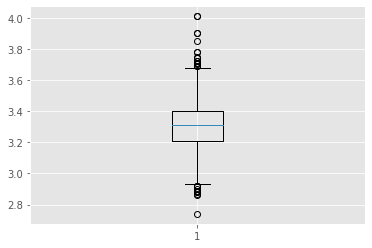

In [13]:
upper_outlier_value = 1.5*(df['pH'].describe()[6]-df['pH'].describe()[4]) + df['pH'].describe()[6]
lower_outlier_value =  df['pH'].describe()[4]-1.5*(df['pH'].describe()[6]-df['pH'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['pH']>upper_outlier_value, 'pH'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['pH']<lower_outlier_value, 'pH'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['pH'])

Upper Outliers:
       sulphates
338        1.00
1408       1.01
586        1.02
506        1.02
181        1.02
1371       1.03
201        1.03
503        1.04
372        1.04
689        1.05
504        1.05
482        1.05
754        1.06
483        1.06
477        1.06
451        1.06
852        1.07
415        1.07
281        1.08
161        1.08
19         1.08
240        1.09
1403       1.10
1165       1.10
376        1.11
79         1.12
369        1.13
515        1.14
83         1.14
1260       1.15
1158       1.16
1288       1.17
692        1.17
1370       1.17
1367       1.18
795        1.18
340        1.18
43         1.20
88         1.22
258        1.26
81         1.28
17         1.28
106        1.31
1319       1.33
1051       1.34
614        1.36
339        1.36
639        1.36
13         1.56
169        1.59
226        1.61
723        1.62
86         1.95
92         1.98
151        2.00
Lower Outliers:
 Empty DataFrame
Columns: [sulphates]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa10fe90150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa10fe96110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa10fe9f150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa10fe96bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa10fe90650>,
  <matplotlib.lines.Line2D at 0x7fa10fe90b90>]}

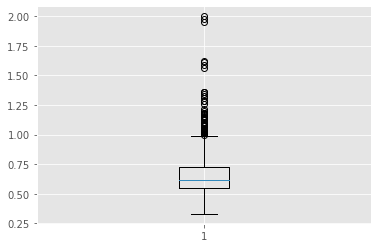

In [14]:
upper_outlier_value = 1.5*(df['sulphates'].describe()[6]-df['sulphates'].describe()[4]) + df['sulphates'].describe()[6]
lower_outlier_value =  df['sulphates'].describe()[4]-1.5*(df['sulphates'].describe()[6]-df['sulphates'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['sulphates']>upper_outlier_value, 'sulphates'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['sulphates']<lower_outlier_value, 'sulphates'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['sulphates'])

Upper Outliers:
         alcohol
1475  13.566667
1114  13.600000
1132  13.600000
1228  13.600000
1477  13.600000
142   14.000000
467   14.000000
588   14.000000
821   14.000000
1269  14.000000
1270  14.000000
652   14.900000
Lower Outliers:
 Empty DataFrame
Columns: [alcohol]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fa10fe05510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa10fe0c4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa10fe13510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa10fe0cf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa10fe05a10>,
  <matplotlib.lines.Line2D at 0x7fa10fe05f50>]}

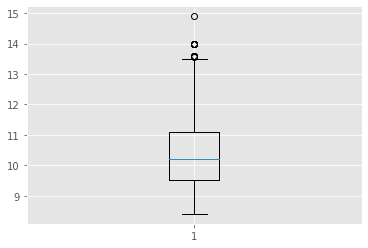

In [15]:
upper_outlier_value = 1.5*(df['alcohol'].describe()[6]-df['alcohol'].describe()[4]) + df['alcohol'].describe()[6]
lower_outlier_value =  df['alcohol'].describe()[4]-1.5*(df['alcohol'].describe()[6]-df['alcohol'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['alcohol']>upper_outlier_value, 'alcohol'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['alcohol']<lower_outlier_value, 'alcohol'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['alcohol'])

Upper Outliers:
       quality
267         8
1403        8
1269        8
1202        8
1120        8
1090        8
1061        8
1449        8
828         8
495         8
481         8
455         8
440         8
390         8
278         8
588         8
1549        8
Lower Outliers:
       quality
459         3
517         3
690         3
832         3
899         3
1299        3
1374        3
1469        3
1478        3
1505        3


{'boxes': [<matplotlib.lines.Line2D at 0x7fa10fd82390>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa10fd87350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa10fd8e3d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa10fd87e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa10fd82890>,
  <matplotlib.lines.Line2D at 0x7fa10fd82dd0>]}

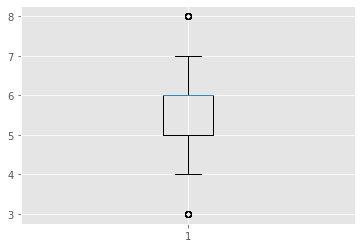

In [16]:
upper_outlier_value = 1.5*(df['quality'].describe()[6]-df['quality'].describe()[4]) + df['quality'].describe()[6]
lower_outlier_value =  df['quality'].describe()[4]-1.5*(df['quality'].describe()[6]-df['quality'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['quality']>upper_outlier_value, 'quality'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['quality']<lower_outlier_value, 'quality'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['quality'])

Sources: Geeks for Geeks, statology, w3schools, Learn Platform, towardsDev.com, shishirkant.com, datatofish.com, datasciencemadesimple.com 

In [17]:
y = df['quality']
X = df.drop(columns = 'quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


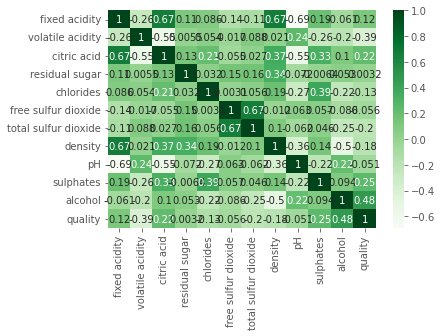

In [18]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

From the above correlation plot, we can see that alcohol levels have the highest correlation with quality, followed by sulphates and citric acid.  Additionally, there is a strong correlation of the fixed acidity feature with the density and citric acid features.

Below is an initial decision tree regression model.

In [33]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
print(f'Model Training MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Model Testing MAE: {mean_absolute_error(y_test, test_preds)}')
print(f'Model Training MSE: {mean_squared_error(y_train, train_preds)}')
print(f'Model Testing MSE: {mean_squared_error(y_test, test_preds)}')
print(f'Model Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}')
print(f'Model Testing RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}')

Model Training MAE: 0.0
Model Testing MAE: 0.6088235294117647
Model Training MSE: 0.0
Model Testing MSE: 0.8323529411764706
Model Training RMSE: 0.0
Model Testing RMSE: 0.9123337882466431


Now we tune hyperparameters using GridSearchCV.

In [34]:
dec_tree = DecisionTreeRegressor(random_state = 42)
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [10, 20, 30, 40, 50, 100],
              'min_samples_split': [2, 10, 100]}
dt_grid_search = GridSearchCV(dec_tree, param_grid)
dt_grid_search.fit(X_train, y_train)
dt_grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 2}

Using these optimal parameters, we create an updated,  hypertuned model.

In [35]:
dec_tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf = 50, min_samples_split = 2, random_state=42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
print(f'Model Training MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Model Testing MAE: {mean_absolute_error(y_test, test_preds)}')
print(f'Model Training MSE: {mean_squared_error(y_train, train_preds)}')
print(f'Model Testing MSE: {mean_squared_error(y_test, test_preds)}')
print(f'Model Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}')
print(f'Model Testing RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}')

Model Training MAE: 0.4979752026034466
Model Testing MAE: 0.4919478543938566
Model Training MSE: 0.4234721330021239
Model Testing MSE: 0.4242996593792479
Model Training RMSE: 0.6507473649598006
Model Testing RMSE: 0.6513828823197981


This hypertuned model has significantly better MAE, MSE, and RMSE metrics on the testing data.

Below is an initial, basic bagged regression model with metrics.

In [36]:
bagreg = BaggingRegressor(random_state = 42)
bagreg.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
print(f'Model Training MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Model Testing MAE: {mean_absolute_error(y_test, test_preds)}')
print(f'Model Training MSE: {mean_squared_error(y_train, train_preds)}')
print(f'Model Testing MSE: {mean_squared_error(y_test, test_preds)}')
print(f'Model Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}')
print(f'Model Testing RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}')

Model Training MAE: 0.4979752026034466
Model Testing MAE: 0.4919478543938566
Model Training MSE: 0.4234721330021239
Model Testing MSE: 0.4242996593792479
Model Training RMSE: 0.6507473649598006
Model Testing RMSE: 0.6513828823197981


In [38]:
bagreg = BaggingRegressor(random_state = 42)
param_grid = {'n_estimators': [5, 10, 15, 20, 40, 80, 160],
              'max_samples': [1, 4, 8],
              'max_features': [1, 4, 8]}
dt_grid_search = GridSearchCV(bagreg, param_grid)
dt_grid_search.fit(X_train, y_train)
dt_grid_search.best_params_

{'max_features': 8, 'max_samples': 8, 'n_estimators': 80}

Below is the hypertuned Bagged Regression model using GridSearchCV with its metrics.

In [39]:
bagreg = BaggingRegressor(n_estimators=80, max_samples = 8, max_features = 8, random_state=42)
bagreg.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
print(f'Model Training MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Model Testing MAE: {mean_absolute_error(y_test, test_preds)}')
print(f'Model Training MSE: {mean_squared_error(y_train, train_preds)}')
print(f'Model Testing MSE: {mean_squared_error(y_test, test_preds)}')
print(f'Model Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}')
print(f'Model Testing RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}')

Model Training MAE: 0.4979752026034466
Model Testing MAE: 0.4919478543938566
Model Training MSE: 0.4234721330021239
Model Testing MSE: 0.4242996593792479
Model Training RMSE: 0.6507473649598006
Model Testing RMSE: 0.6513828823197981


Text(0, 0.5, 'quality')

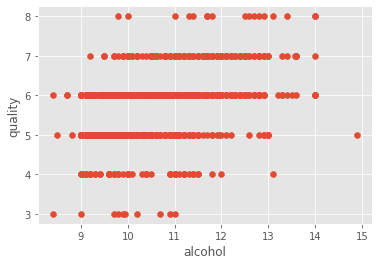

In [21]:
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel("alcohol")
plt.ylabel("quality")

From here we can see that generally speaking, higher alcohol levels correspond to higher quality ratings.  Using this information, perhaps a stakeholder would decide to invest more resources into the fermentation process of wine in order to produce higher alcoholic levels and therefor a higher quality wine to be sold.

Text(0, 0.5, 'density')

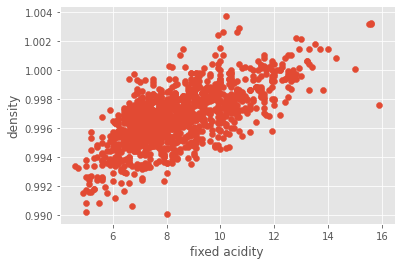

In [22]:
plt.scatter(df['fixed acidity'],df['density'])
plt.xlabel("fixed acidity")
plt.ylabel("density")

From this graph, we can see that there is a strong positive correlation between fixed acidity levels and the density of the wine.  In terms of practical application, if a stakeholder wanted to decrease a wine's density for various reasons, they could begin by taking a look at how to reduce fixed acidity levels due to this correlation.

In [23]:
X = df.drop(columns = 'quality')
# Encode our target
y = df['quality']
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)
pca = PCA()
pca.fit(scaled_df)

PCA()

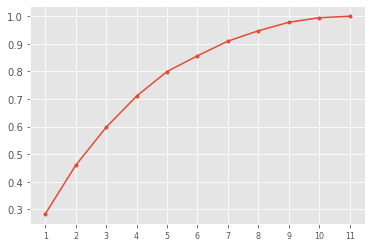

In [24]:
plt.plot(range(1, 12), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,12), fontsize=8);

It appears there is a slight elbow at 9 components, so we can use 9 as our PCA value.

Text(0, 0.5, 'Proportion of Explained Variance')

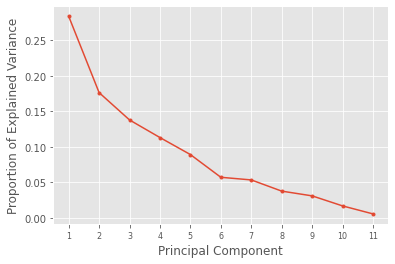

In [25]:
plt.plot(range(1, 12), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 12), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

This plot shows a definite flatness of slope at the 6th component, so we will actually choose our number of compnents to be 6 since after that, the slopes are flatter than before indicating that components beyond six explain less variance.

Model Training MAE: 0.5524611682642856
Model Testing MAE: 0.553665883458907
Model Training MSE: 0.47145060785541615
Model Testing MSE: 0.4662266921947055
Model Training RMSE: 0.6866226094845815
Model Testing RMSE: 0.6828079467864339


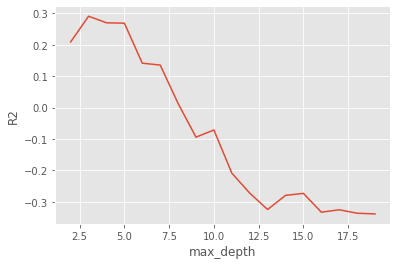

In [26]:
pca6 = PCA(n_components=6)
transformer = make_pipeline(StandardScaler(), pca6)
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree_pipe = make_pipeline(transformer, dec_tree)
dec_tree_pipe.fit(X_train, y_train)
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
#print(train_score)
#print(test_score)
# List of values to try for max_depth:
depths = list(range(2, 20)) # will try every value between 2 and 20
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    transformer = make_pipeline(StandardScaler(), PCA(n_components=6))
    dec_tree_pipe = make_pipeline(transformer, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_test, y_test)
    test_score = dec_tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

#print(scores)
dec_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
dec_tree_pipe = make_pipeline(transformer, dec_tree)
dec_tree_pipe.fit(X_train, y_train)
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)
print(f'Model Training MAE: {mean_absolute_error(y_train, train_preds)}')
print(f'Model Testing MAE: {mean_absolute_error(y_test, test_preds)}')
print(f'Model Training MSE: {mean_squared_error(y_train, train_preds)}')
print(f'Model Testing MSE: {mean_squared_error(y_test, test_preds)}')
print(f'Model Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}')
print(f'Model Testing RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}')


From this graph, we can see that the highest R^2 value for the decision tree model with PCA is found using a depth of 3.

My final production model of choice is the tuned bagged regression model without PCA. This is beacuse it has overall the lowest regression error metrics when compared to the other models.  In particular, its training and testing mean absolute errors are lower than both of these metrics for the tuned decision tree and PCA bagged regression models.  Furthermore, the Mean Squared Error metrics for the bagged regression model without PCA is lower than the same metrics for the other two.  Thus, due to lower error values, this model is the best for production.